In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## Demo Paper Image

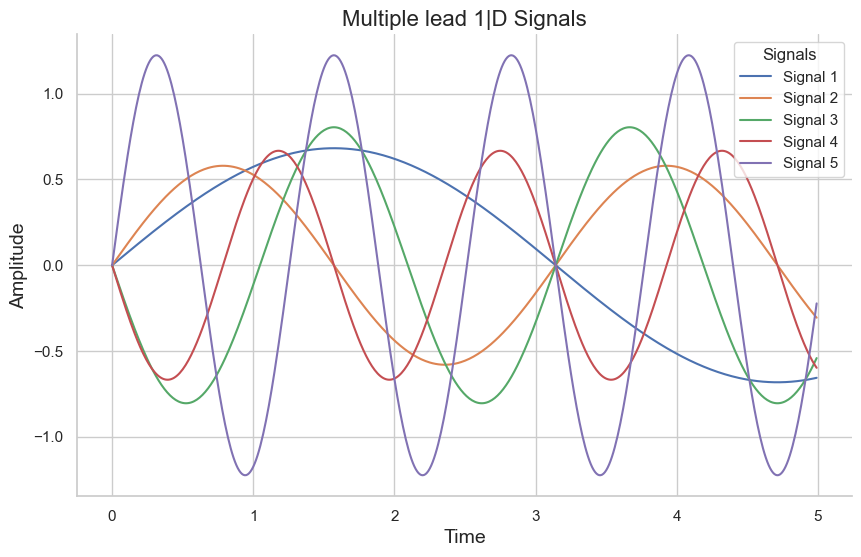

In [35]:

# Initialize Seaborn
sns.set(style="whitegrid")

# Generate the data
data_ = []
x = np.arange(0, 5, 0.01)
for i in range(1, 6):
    data_.append(np.random.randn() * np.sin(i * x))

# Create the plot
plt.figure(figsize=(10, 6))
for i in range(len(data_)):
    plt.plot(x, data_[i], label=f'Signal {i+1}')

# Enhance the plot aesthetics
plt.title('Multiple lead 1D Signals', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.legend(title='Signals', loc='upper right')
plt.grid(True)
sns.despine()  # Removes the top and right spines

# Show the plot
plt.show()


In [124]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Seaborn
sns.set(style="white")

# Generate the data
data_ = []
x = np.arange(0, 5, 0.01)
for i in range(1, 6):
    data_.append(np.random.randn() * np.sin(i * x))




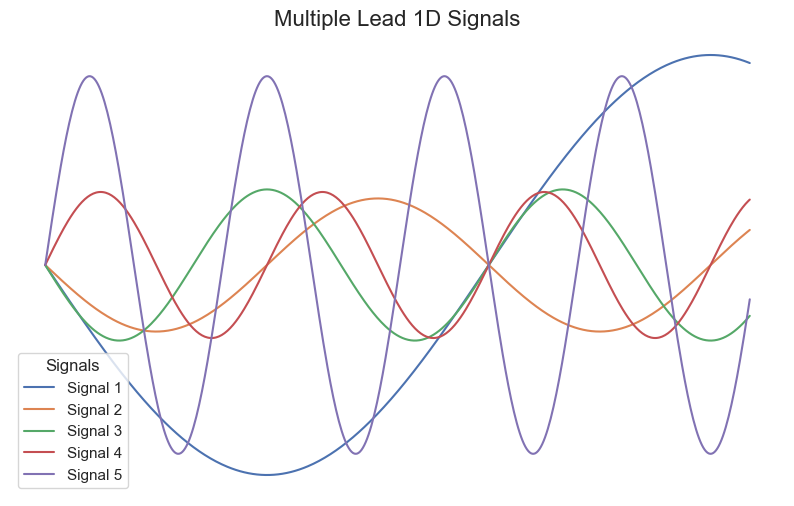

In [125]:
# Create the plot
plt.figure(figsize=(10, 6))
for i in range(len(data_)):
    plt.plot(x, data_[i], label=f'Signal {i+1}')

# Enhance the plot aesthetics
plt.title('Multiple Lead 1D Signals', fontsize=16)
plt.legend(title='Signals', loc='best')

# Remove axis and grid
plt.axis('off')

# Show the plot
plt.savefig('image_1D_multiple_signals.png')

In [104]:
from sklearn.preprocessing import StandardScaler
from scipy.special import legendre

def superposition(data: np.ndarray):# it will create super position of 12 lead ecg data 

    """
    This function takes a 5000 * 12 lead data and returns the superposition of the data.
    superpostion matrix multiplied by legendre(j+1)(x) we get the j-th column of the data matrix 
    or we can say the jth lead of the ecg data
    """
    scale=StandardScaler()
    # making each colum of 5000 datapoint should be in
    scaled = scale.fit_transform(data)# normal distribution of each column of the data matrix # feature scaling
    sum=np.zeros((1000,1000))
    x = np.linspace(-1,1,1000)
    for i in range(data.shape[0]):
        leg=legendre(i+1)(x)
        norm=np.linalg.norm(leg)
        sum=sum+np.outer(data[i],#data is in shaPE OF 5000xDATA.shape[1] AN SHAPE[1] MEANS THE NUMBER OF COLUMNS
                         leg#legendre polinomial of order i+1 apllied to x p_n applies to matrix x
                         )/norm
        #outer product of the i-th column of the data matrix and the i-th legendre polynomial
        
    
    return sum

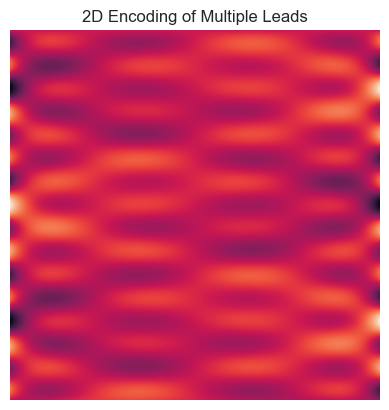

In [115]:
data_ = []
x = np.arange(0, 10, 0.01)
for i in range(1, 6):
    data_.append(np.random.randn() * np.sin(i * x))
plt.imshow(superposition(np.array(data_)))
plt.axis('off')
plt.title('2D Encoding of Multiple Leads')
plt.savefig('2dimage.png')

## 12 Lead ECG paper image

In [3]:
data_1 = loadmat('/Users/pingal/Documents/GitHub/ECG_ML/MAIN/Example ECG/data_1.mat')
data_2 = loadmat('/Users/pingal/Documents/GitHub/ECG_ML/MAIN/Example ECG/data_2.mat')


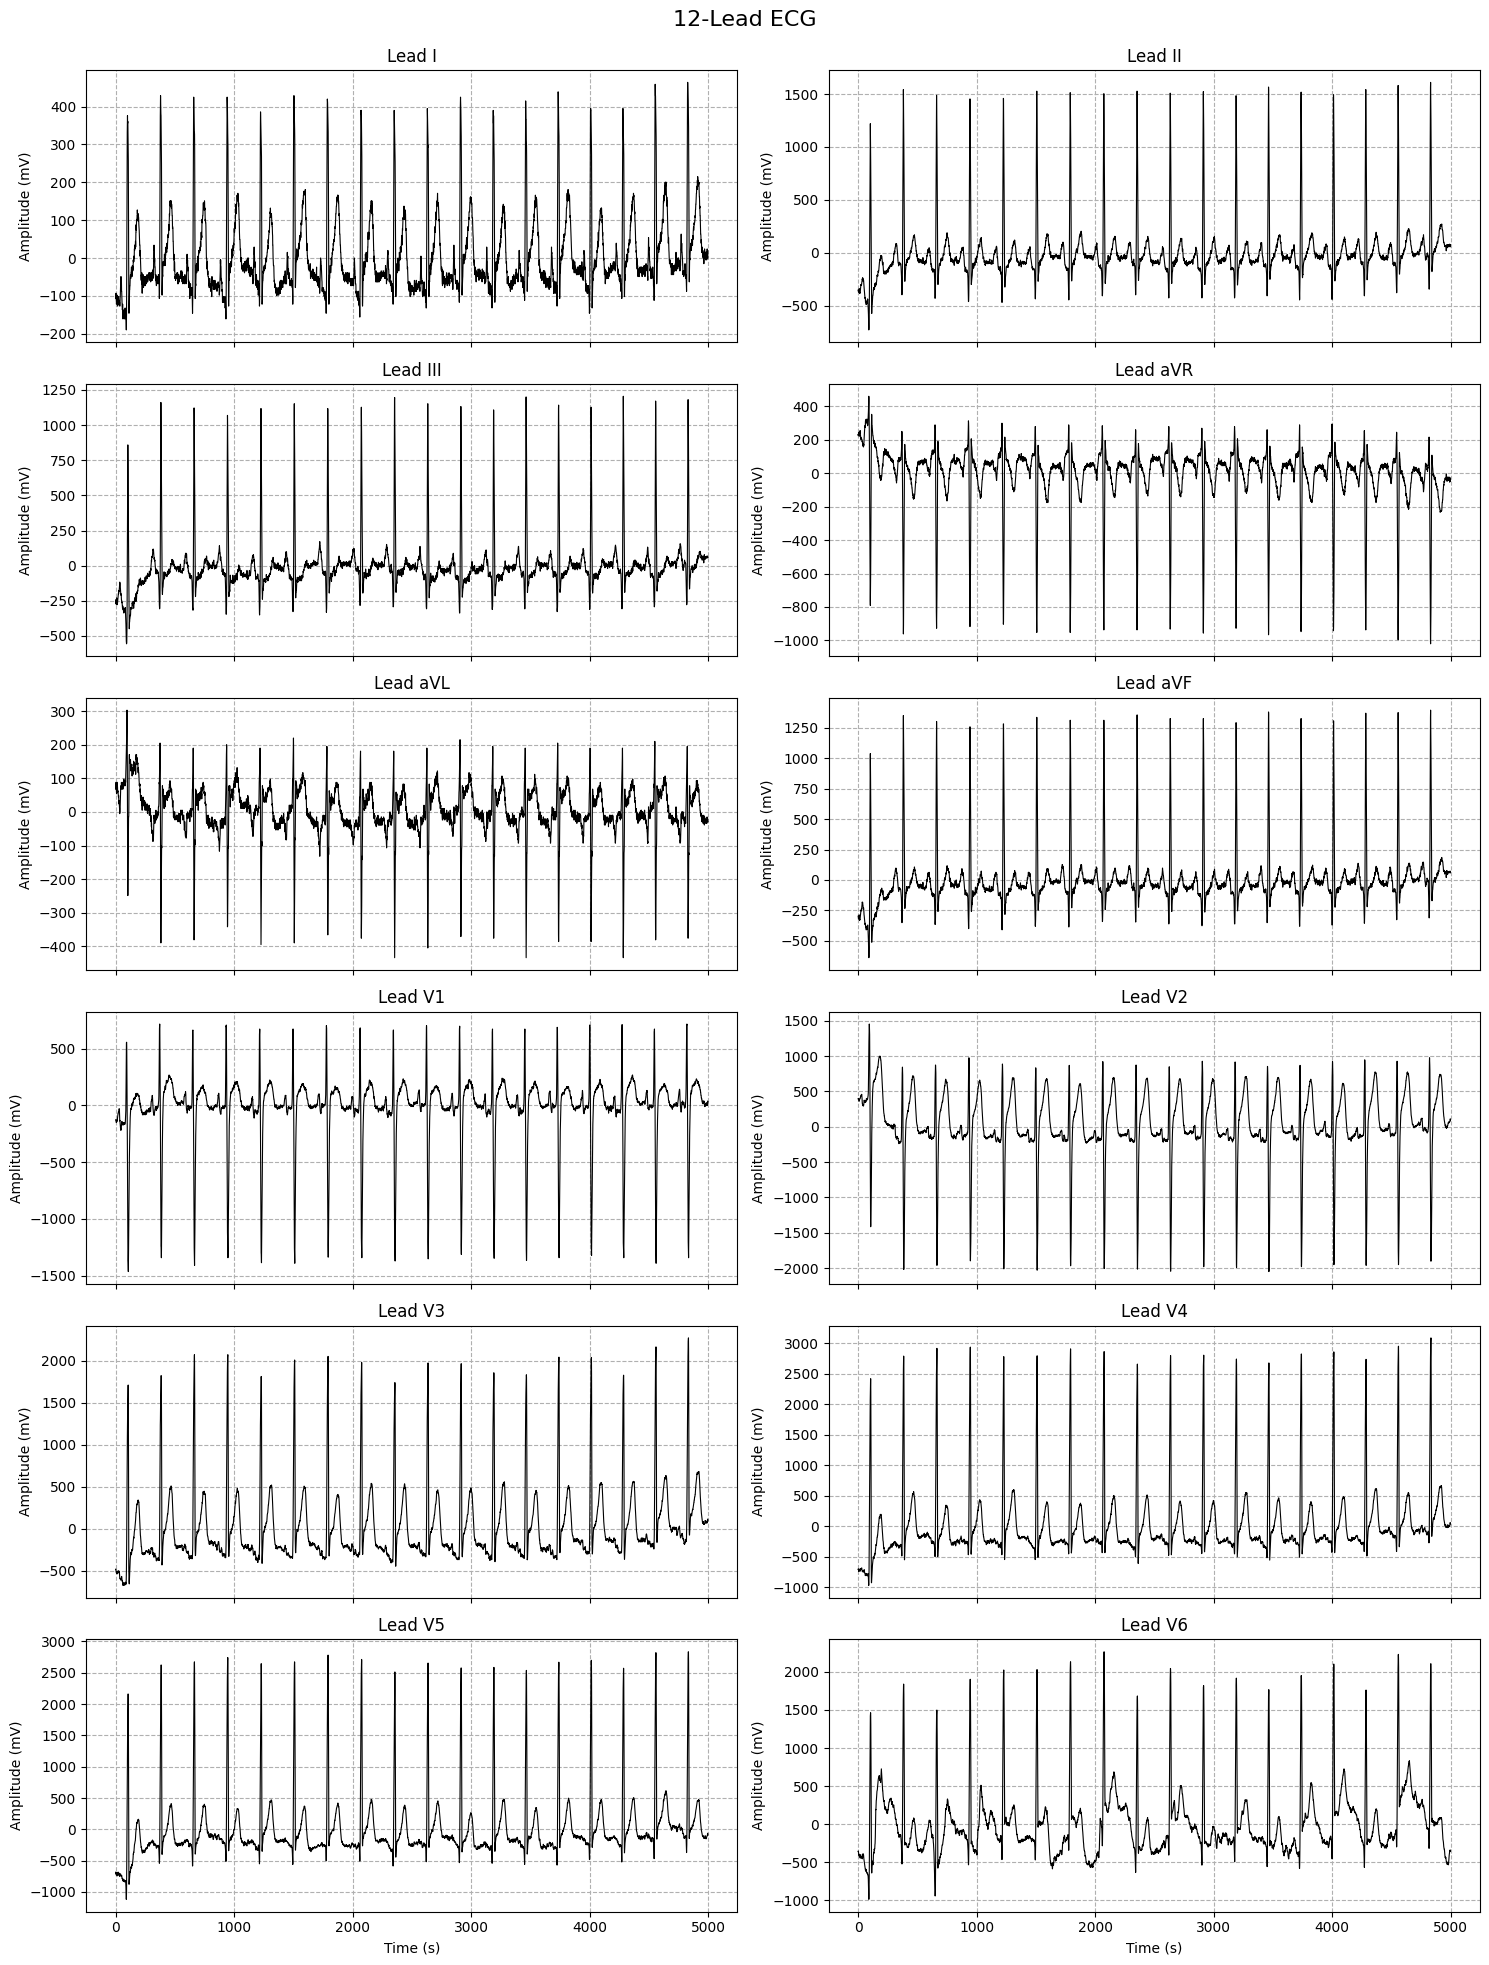

In [7]:
leads = []
for i in range(len(data_1['val'])):
    leads.append(data_1['val'][i])

lead_names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

fig, axs = plt.subplots(6, 2, figsize=(15, 20), sharex=True)
fig.suptitle('12-Lead ECG', fontsize=16)

for i, (lead, name) in enumerate(zip(leads, lead_names)):
    row = i // 2
    col = i % 2
    axs[row, col].plot(lead, color='black', linewidth=0.8)
    axs[row, col].set_title(f'Lead {name}', fontsize=12)
    # axs[row, col].set_ylim(-2, 2)
    axs[row, col].grid(True, linestyle='--', alpha=1)
    
    if row == 5:
        axs[row, col].set_xlabel('Time (s)')
    
    axs[row, col].set_ylabel('Amplitude (mV)')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig('12_lead_ecg.png')

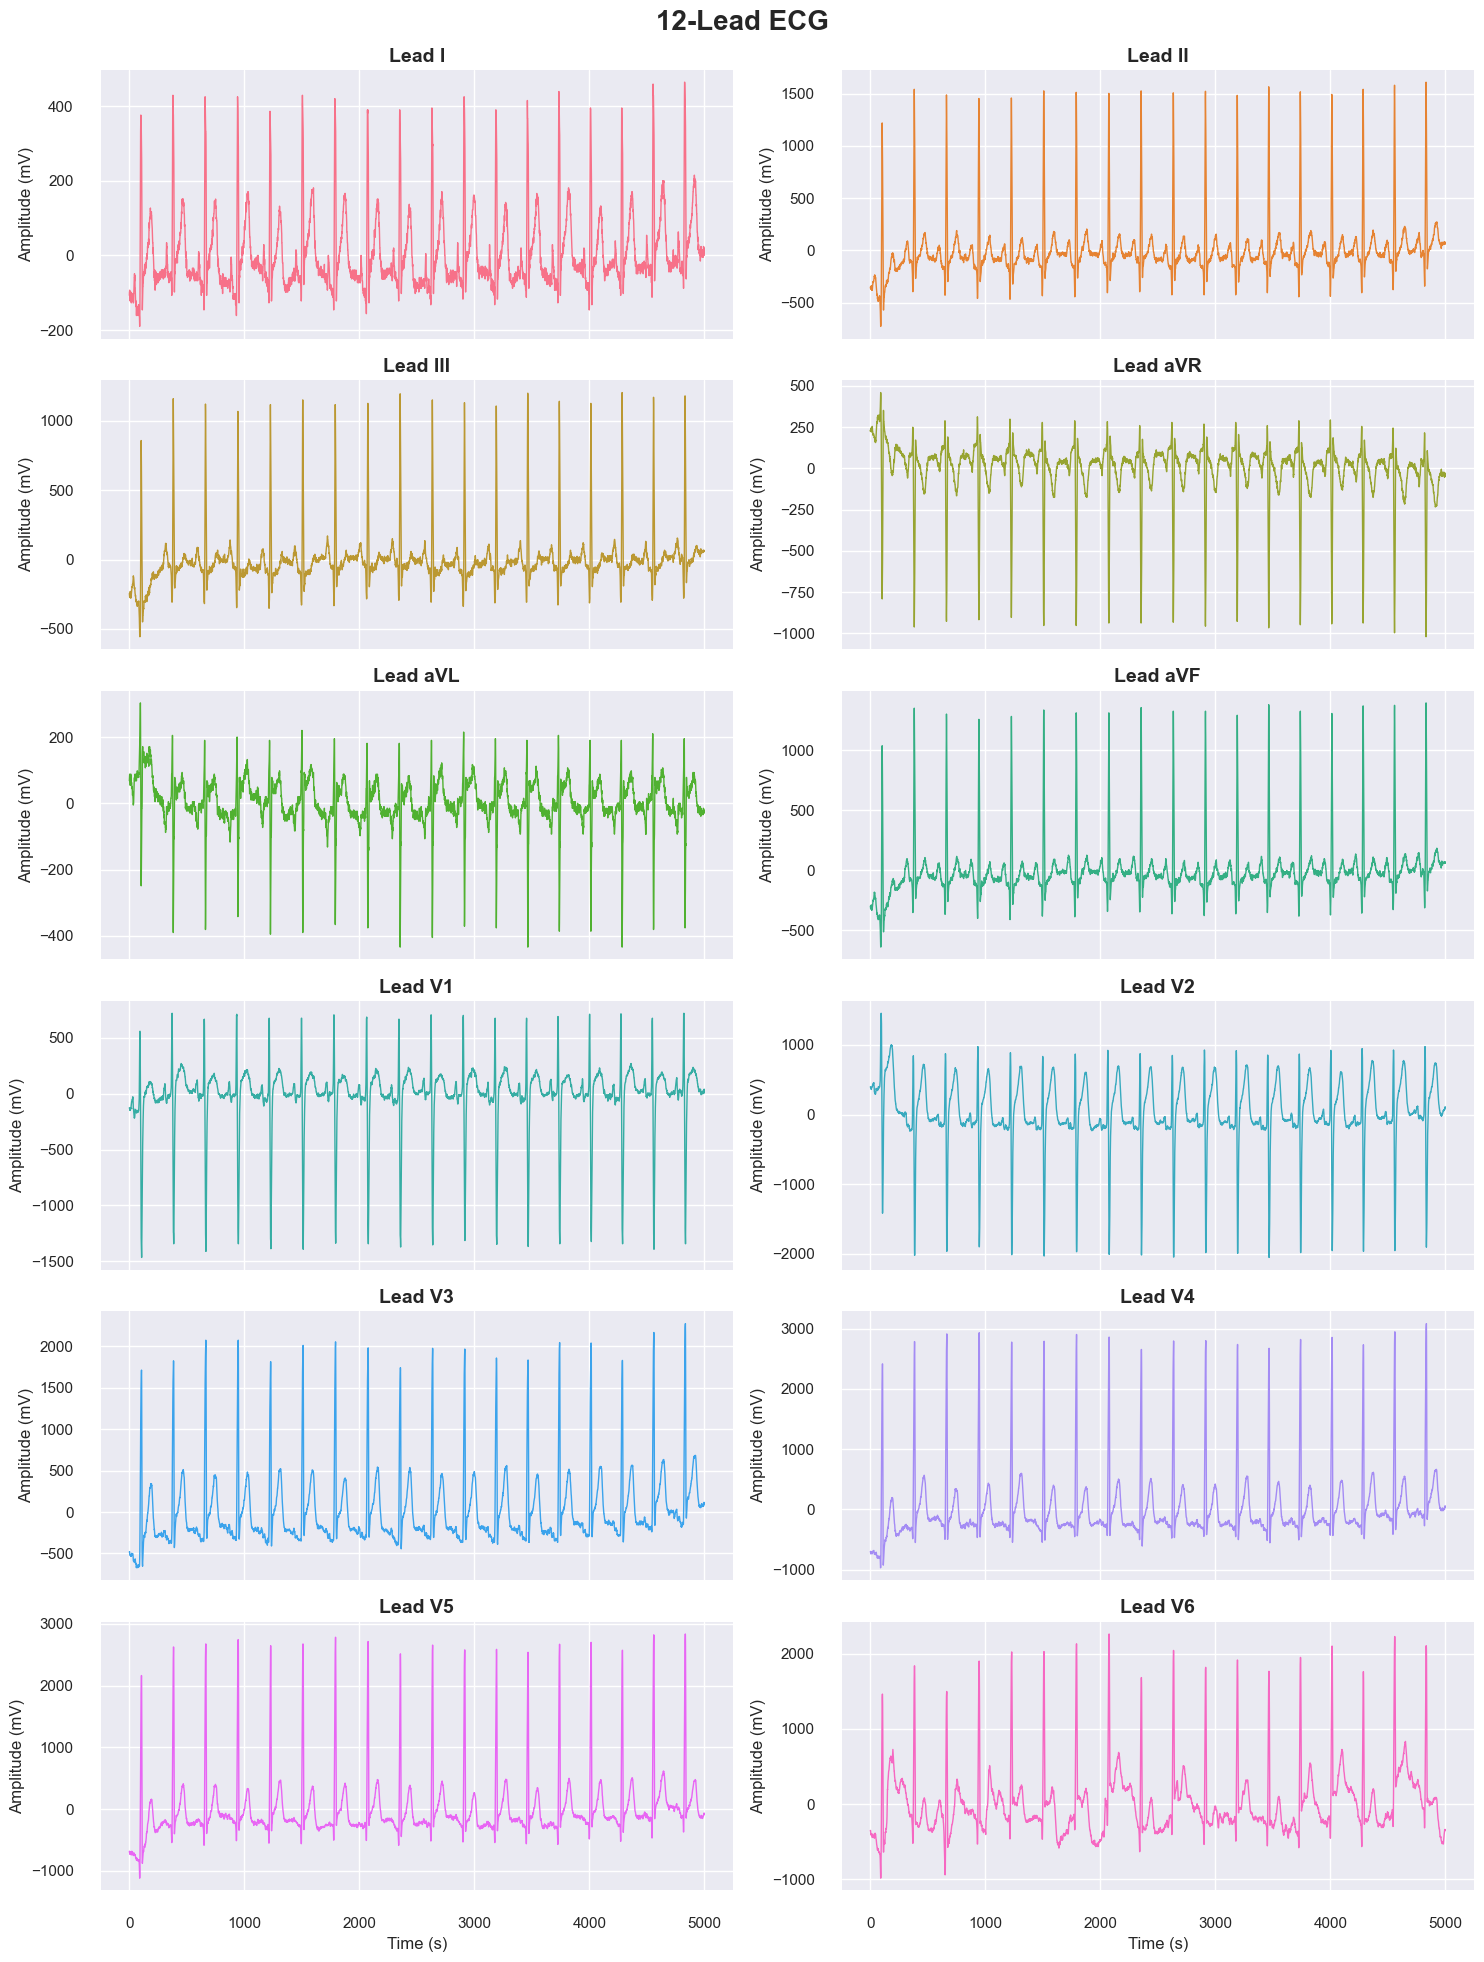

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn style and color palette
sns.set_theme(style="darkgrid")
palette = sns.color_palette("husl", 12)

leads = []
for i in range(len(data_1['val'])):
    leads.append(data_1['val'][i])

lead_names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

fig, axs = plt.subplots(6, 2, figsize=(15, 20), sharex=True)
fig.suptitle('12-Lead ECG', fontsize=20, fontweight='bold')

for i, (lead, name, color) in enumerate(zip(leads, lead_names, palette)):
    row = i // 2
    col = i % 2
    sns.lineplot(lead, ax=axs[row, col], color=color, linewidth=1)
    axs[row, col].set_title(f'Lead {name}', fontsize=14, fontweight='bold')
    
    if row == 5:
        axs[row, col].set_xlabel('Time (s)', fontsize=12)
    else:
        axs[row, col].set_xlabel('')
    
    axs[row, col].set_ylabel('Amplitude (mV)', fontsize=12)
    
    # Remove top and right spines
    sns.despine(ax=axs[row, col], offset=10, trim=True)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
from scipy.special import legendre

def superposition(data: np.ndarray):# it will create super position of 12 lead ecg data 

    """
    This function takes a 5000 * 12 lead data and returns the superposition of the data.
    superpostion matrix multiplied by legendre(j+1)(x) we get the j-th column of the data matrix 
    or we can say the jth lead of the ecg data
    """
    scale=StandardScaler()
    # making each colum of 5000 datapoint should be in
    scaled = scale.fit_transform(data)# normal distribution of each column of the data matrix # feature scaling
    sum=np.zeros((5000,5000))
    x = np.linspace(-1,1,5000)
    for i in range(data.shape[0]):
        leg=legendre(i+1)(x)
        norm=np.linalg.norm(leg)
        sum=sum+np.outer(data[i],#data is in shaPE OF 5000xDATA.shape[1] AN SHAPE[1] MEANS THE NUMBER OF COLUMNS
                         leg#legendre polinomial of order i+1 apllied to x p_n applies to matrix x
                         )/norm
        #outer product of the i-th column of the data matrix and the i-th legendre polynomial
        
    
    return sum

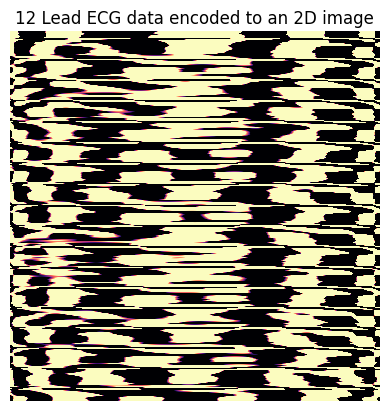

In [17]:
cc = superposition(np.array(data_1['val']))
plt.imshow(superposition(np.array(data_1['val'])),cmap = 'magma',vmin=cc.min()/1000,vmax=cc.max()/1000)
plt.axis('off')
plt.title('12 Lead ECG data encoded to an 2D image')
plt.savefig('12_lead_ecg_encoding.png')